In [1]:
from __future__ import print_function, division
from builtins import range, input

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

In [2]:
# load in the data
import os
if not os.path.exists('user2movie.json') or \
   not os.path.exists('movie2user.json') or \
   not os.path.exists('usermovie2rating.json') or \
   not os.path.exists('usermovie2rating_test.json'):
   import preprocess2dict


with open('user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)

with open('movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)

with open('usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)

with open('usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)


In [3]:
N = np.max(list(user2movie.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)


# initialize variables
K = 10 # latent dimensionality
W = np.random.randn(N, K)
b = np.zeros(N)
U = np.random.randn(M, K)
c = np.zeros(M)
mu = np.mean(list(usermovie2rating.values()))

# prediction[i,j] = W[i].dot(U[j]) + b[i] + c.T[j] + mu

def get_loss(d):
  # d: (user_id, movie_id) -> rating
  N = float(len(d))
  sse = 0
  for k, r in d.items():
    i, j = k
    p = W[i].dot(U[j]) + b[i] + c[j] + mu
    sse += (p - r)*(p - r)
  return sse / N


N: 10000 M: 2000


epoch: 0
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:01:41.814687
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:01:37.574123
epoch duration: 0:03:19.389109
calculate cost: 0:00:26.840149
train loss: 0.6941671655040121
test loss: 0.7052413724586424
epoch: 1
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:01:40.886128
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:01:38.182116
epoch duration: 0:03:19.069277
calculate cost: 0:00:16.508695
train loss: 0.568916661403909

i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:01:18.999864
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:01:21.832606
epoch duration: 0:02:40.832737
calculate cost: 0:00:13.218268
train loss: 0.509908924011822
test loss: 0.5400757428047074
epoch: 17
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:22:39.597959
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:01:21.848051
epoch duration: 0:24:01.446849
calculate cost: 0:00:13.461935
train loss: 0.5098944661770126
test loss: 0.54006047

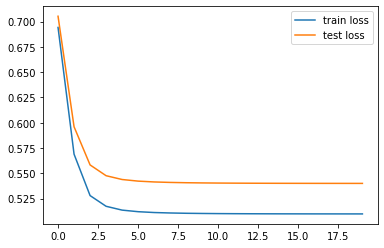

In [4]:
# train the parameters
epochs = 20
reg =20. # regularization penalty
train_losses = []
test_losses = []
for epoch in range(epochs):
  print("epoch:", epoch)
  epoch_start = datetime.now()
  # perform updates

  # update W and b
  t0 = datetime.now()
  for i in range(N):
    # for W
    matrix = np.eye(K) * reg
    vector = np.zeros(K)

    # for b
    bi = 0
    for j in user2movie[i]:
      r = usermovie2rating[(i,j)]
      matrix += np.outer(U[j], U[j])
      vector += (r - b[i] - c[j] - mu)*U[j]
      bi += (r - W[i].dot(U[j]) - c[j] - mu)

    # set the updates
    W[i] = np.linalg.solve(matrix, vector)
    b[i] = bi / (len(user2movie[i]) + reg)

    if i % (N//10) == 0:
      print("i:", i, "N:", N)
  print("updated W and b:", datetime.now() - t0)

  # update U and c
  t0 = datetime.now()
  for j in range(M):
    # for U
    matrix = np.eye(K) * reg
    vector = np.zeros(K)

    # for c
    cj = 0
    try:
      for i in movie2user[j]:
        r = usermovie2rating[(i,j)]
        matrix += np.outer(W[i], W[i])
        vector += (r - b[i] - c[j] - mu)*W[i]
        cj += (r - W[i].dot(U[j]) - b[i] - mu)

      # set the updates
      U[j] = np.linalg.solve(matrix, vector)
      c[j] = cj / (len(movie2user[j]) + reg)

      if j % (M//10) == 0:
        print("j:", j, "M:", M)
    except KeyError:
      # possible not to have any ratings for a movie
      pass
  print("updated U and c:", datetime.now() - t0)
  print("epoch duration:", datetime.now() - epoch_start)


  # store train loss
  t0 = datetime.now()
  train_losses.append(get_loss(usermovie2rating))

  # store test loss
  test_losses.append(get_loss(usermovie2rating_test))
  print("calculate cost:", datetime.now() - t0)
  print("train loss:", train_losses[-1])
  print("test loss:", test_losses[-1])


print("train losses:", train_losses)
print("test losses:", test_losses)

# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

